In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("./dataset/exported/data.csv")

In [3]:
df["x"] = df["x"]-10

In [4]:
df = df[df["z"]==176].drop(columns=["z"])

In [5]:
df["x"] = df["x"] / 10
df["y"] = df["y"] / 10

df = df.groupby(["x","y"]).mean().reset_index()

In [6]:
df = df.astype({"x": np.int16, "y": np.int16})

In [7]:
y_size = df["y"].max()+1
x_size = df["x"].max()+1
leds = df.columns.difference(["x","y"])
leds = sorted(leds, key=lambda x: int(x.split('_')[1]))
led_size = len(leds)

In [8]:
matrix = np.zeros((y_size, x_size, led_size))

for i, led in enumerate(leds):
    matrix[df["y"],df["x"], i] = df[led]

In [11]:
import matplotlib.pyplot as plt

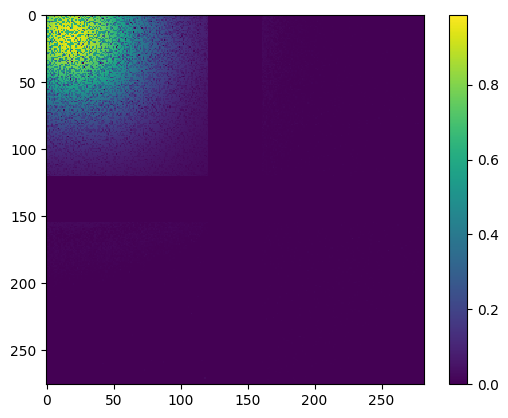

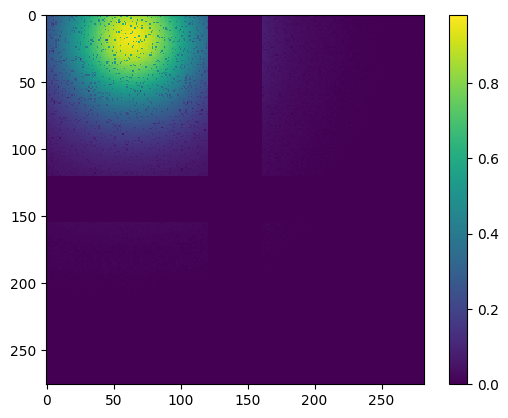

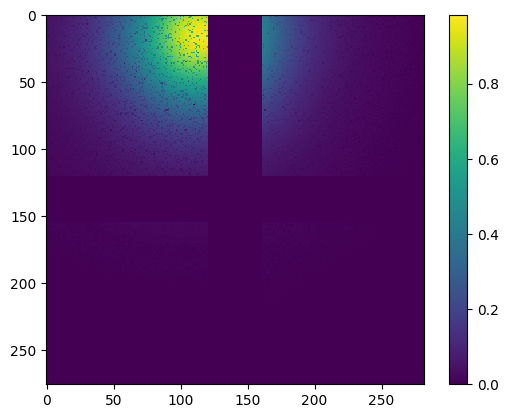

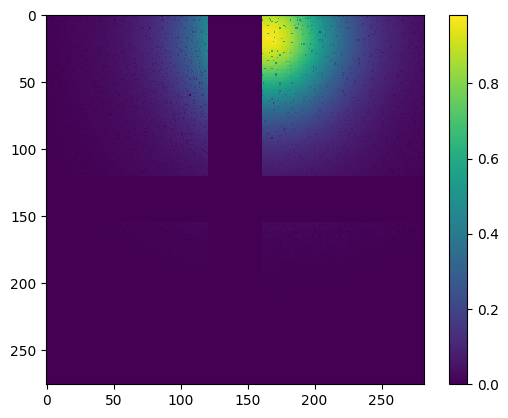

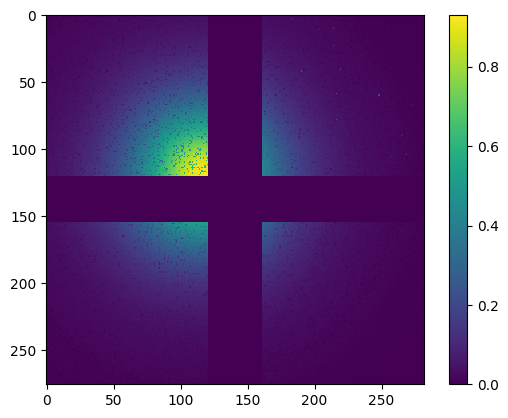

In [12]:
leds_to_plot = [0, 1, 2, 3, 14]

for i in leds_to_plot:
    plt.imshow(matrix[:, :, i], interpolation='nearest')
    plt.colorbar()
    plt.show()